In [1]:
import sklearn
from sklearn import datasets
from sklearn import svm
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# 导入kmeans
from sklearn.cluster import KMeans

# 导入PCA
from sklearn.decomposition import PCA

import imblearn
# 导入过采样
# 导入SMOTE
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
# 导入欠采样
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import ClusterCentroids

from imblearn.combine import SMOTETomek
from imblearn.combine import SMOTEENN




import xgboost
from xgboost import XGBClassifier

import matplotlib
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from collections import Counter

warnings.filterwarnings('ignore')
%matplotlib inline


In [2]:
# 导入数据
# https://archive-beta.ics.uci.edu/dataset/267/banknote+authentication
banknote = pd.read_csv('./data/data_banknote_authentication.txt',  header=None)
banknote.columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
banknote.head()


,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


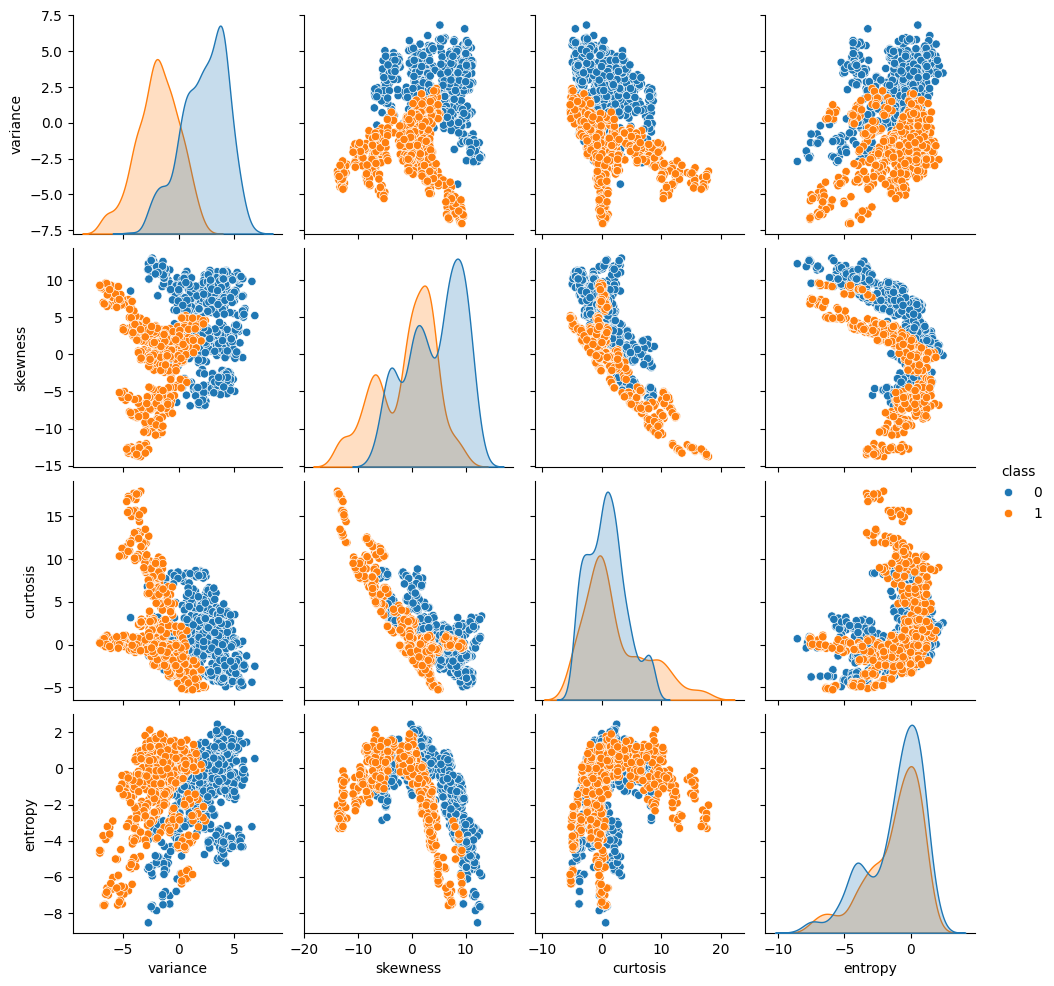

In [3]:
# 可视化
sns.pairplot(banknote, hue='class', size=2.5)
plt.show()


In [4]:
# 数据探索
banknote.describe()


,variance,skewness,curtosis,entropy,class
count,1372.000000,1372.000000,1372.000000,1372.000000,1372.000000
mean,0.433735,1.922353,1.397627,-1.191657,0.444606
std,2.842763,5.869047,4.310030,2.101013,0.497103
min,-7.042100,-13.773100,-5.286100,-8.548200,0.000000
25%,-1.773000,-1.708200,-1.574975,-2.413450,0.000000
50%,0.496180,2.319650,0.616630,-0.586650,0.000000
75%,2.821475,6.814625,3.179250,0.394810,1.000000
max,6.824800,12.951600,17.927400,2.449500,1.000000


In [5]:
# 数据集中的数据都是数值型的，没有缺失值，也没有异常值，所以不需要进行数据清洗。
# 但是我们可以看到，数据集中的数据都是数值型的，所以我们需要对数据进行标准化处理。
# 为了方便后面的处理，我们将数据集分为特征集和标签集。
X = banknote.drop('class', axis=1)
y = banknote['class']


In [6]:
# 使用不同的数据处理方法（如数据重采样、数据加权、特征选择等）来处理不均衡数据


In [7]:
# 数据集划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



In [8]:
# 检查数据集形状
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

# 检查数据集标签
print('y_train value counts: ', Counter(y_train))
print('y_test value counts: ', Counter(y_test))

X_train shape:  (960, 4)
X_test shape:  (412, 4)
y_train shape:  (960,)
y_test shape:  (412,)
y_train value counts:  Counter({0: 530, 1: 430})
y_test value counts:  Counter({0: 232, 1: 180})


In [9]:
# 不均衡数据对传统分类器的影响

In [10]:
# 特征归一化
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [11]:
# XGboost训练
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
print('XGboost准确率：', accuracy_score(y_test, y_pred_xgb))

# KFold交叉验证评估XGboost模型
kfold = KFold(n_splits=10, random_state=None)
results_xgb = cross_val_score(xgb, X_train, y_train, cv=kfold)
print('XGboost交叉验证准确率：', results_xgb.mean())

XGboost准确率： 0.9927184466019418
XGboost交叉验证准确率： 0.9916666666666666


In [12]:
# svm训练
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
print('svm准确率：', accuracy_score(y_test, y_pred_svm))

# KFold交叉验证评估svm模型
kfold = KFold(n_splits=10, random_state=None)
results_svm = cross_val_score(svm, X_train, y_train, cv=kfold)
print('svm交叉验证准确率：', results_svm.mean())

svm准确率： 1.0
svm交叉验证准确率： 1.0


In [13]:
# RandomForest训练
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print('RandomForest准确率：', accuracy_score(y_test, y_pred_rf.astype(np.int64)))
# predict和label的数据类型不同，predict还是float类型，表示分类类别的概率。label是int类型，代表的是类别标签

# KFold交叉验证评估random forest模型
kfold = KFold(n_splits=10, random_state=None)
results_rf = cross_val_score(rf, X_train, y_train, cv=kfold)
print('RandomForest交叉验证准确率：', results_rf.mean())

RandomForest准确率： 0.8980582524271845
RandomForest交叉验证准确率： 0.9612687081325996


In [14]:
# GradientBoosting训练
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)
print('GradientBoosting准确率：', accuracy_score(y_test, y_pred_gb.astype(np.int64)))
# kfold交叉验证评估GradientBoosting模型
kfold = KFold(n_splits=10, random_state=None)
results_gb = cross_val_score(gb, X_train, y_train, cv=kfold)
print('GradientBoosting交叉验证准确率：', results_gb.mean())


GradientBoosting准确率： 0.6990291262135923
GradientBoosting交叉验证准确率： 0.9554201014029544


In [15]:
# ExtraTreesRegressor训练
et = ExtraTreesRegressor()
et.fit(X_train, y_train)
y_pred_et = et.predict(X_test)
print('ExtraTreesRegressor准确率：', accuracy_score(y_test, y_pred_et.astype(np.int64)))

# Kfold交叉验证评估ExtraTreesRegressor模型
kfold = KFold(n_splits=10, random_state=None)
results_et = cross_val_score(et, X_train, y_train, cv=kfold)
print('ExtraTreesRegressor交叉验证准确率：', results_et.mean())


ExtraTreesRegressor准确率： 0.8713592233009708
ExtraTreesRegressor交叉验证准确率： 0.9903998166199436


In [16]:
# LinearRegression训练
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
print('LinearRegression准确率：', accuracy_score(y_test, y_pred_lr.astype(np.int64)))

# kfold交叉验证评估LinearRegression模型
kfold = KFold(n_splits=10, random_state=None)
results_lr = cross_val_score(lr, X_train, y_train, cv=kfold)
print('LinearRegression交叉验证准确率：', results_lr.mean())


LinearRegression准确率： 0.6868932038834952
LinearRegression交叉验证准确率： 0.8656206880744337


In [17]:
# Ridge训练
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
print('Ridge准确率：', accuracy_score(y_test, y_pred_ridge.astype(np.int64)))

# kfold验证评估Ridge模型
kfold = KFold(n_splits=10, random_state=None)
results_ridge = cross_val_score(ridge, X_train, y_train, cv=kfold)
print('Ridge交叉验证准确率：', results_ridge.mean())


Ridge准确率： 0.6844660194174758
Ridge交叉验证准确率： 0.8656096567425976


In [18]:
# Lasso训练
lasso = Lasso()
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
print('Lasso准确率：', accuracy_score(y_test, y_pred_lasso.astype(np.int64)))

# kfold交叉验证评估Lasso模型    
kfold = KFold(n_splits=10, random_state=None)
results_lasso = cross_val_score(lasso, X_train, y_train, cv=kfold)
print('Lasso交叉验证准确率：', results_lasso.mean())


Lasso准确率： 0.5631067961165048
Lasso交叉验证准确率： -0.007906689939552302


In [19]:
# SGDRegressor训练
sgd = SGDRegressor()
sgd.fit(X_train, y_train)
y_pred_sgd = sgd.predict(X_test)
print('SGDRegressor准确率：', accuracy_score(y_test, y_pred_sgd.astype(np.int64)))

# kfold交叉验证评估SGDRegressor模型
kfold = KFold(n_splits=10, random_state=None)
results_sgd = cross_val_score(sgd, X_train, y_train, cv=kfold)
print('SGDRegressor交叉验证准确率：', results_sgd.mean())


SGDRegressor准确率： 0.6674757281553398
SGDRegressor交叉验证准确率： 0.8631194870527382


In [20]:
# KernelRidge训练
kr = KernelRidge()
kr.fit(X_train, y_train)
y_pred_kr = kr.predict(X_test)
print('KernelRidge准确率：', accuracy_score(y_test, y_pred_kr.astype(np.int64)))

# kfold交叉验证评估KernelRidge模型
kfold = KFold(n_splits=10, random_state=None)
results_kr = cross_val_score(kr, X_train, y_train, cv=kfold)
print('KernelRidge交叉验证准确率：', results_kr.mean())


KernelRidge准确率： 0.5631067961165048
KernelRidge交叉验证准确率： 0.04369864339548506


In [21]:
# 对于未经处理的数据,我训练了包括KernelRidge Ridge SGDRegressor Lasso LinearRegression
#  ExtraTreesRegressor GradientBoostingRegressor RandomForestRegressor SVM XGBoost在内的10个模型。

# 我使用了交叉验证来评估模型的准确性。
# 模型的得分如下：
# SGDRegressor交叉验证准确率： 0.8631595873737876
# KernelRidge交叉验证准确率： 0.043698643395488415
# Lasso交叉验证准确率： -0.007906689939552302
# Ridge交叉验证准确率： 0.8656096567425976
# LinearRegression交叉验证准确率： 0.8656206880744337
# ExtraTreesRegressor交叉验证准确率： 0.9908990575904794
# GradientBoosting交叉验证准确率： 0.9554416627272119
# RandomForest交叉验证准确率： 0.9616111476657251
# svm交叉验证准确率： 1.0
# XGboost交叉验证准确率： 0.9927083333333334

X_train_smote.shape: (1060, 3)
y_train_smote.shape: (1060,)
y_train_smote: Counter({0: 530, 1: 530})


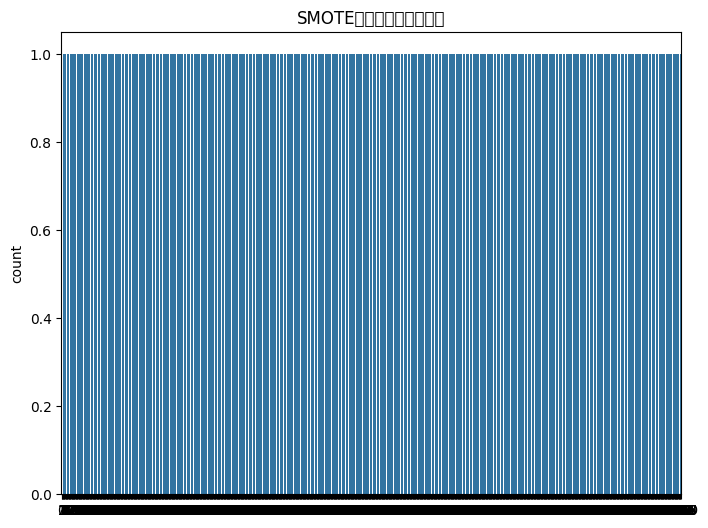

In [22]:
# 接下来进行数据处理以应对数据集的不均衡性，这里使用了SMOTE算法，即合成少数类样本，使得数据集的样本数目达到均衡。
# SMOTE算法的原理是，对于少数类样本中的每一个样本，都会找到与其最近邻的k个样本，然后从这k个样本中随机选择一个作为合成样本的特征。
# 通过这种方法，可以使得少数类样本的数量达到均衡。
# SMOTE算法的缺点是，合成的样本可能会带来噪声，因此在使用SMOTE算法之前，需要先对数据进行降维处理，这里使用了PCA算法。
# PCA算法的原理是，对于一个n维的数据集，PCA算法会将其降维到k维，其中k<n，这样就可以减少数据集中的噪声。
# 降维之后，再使用SMOTE算法，使得数据集的样本数目达到均衡。

# PCA降维
pca = PCA(n_components=0.9, whiten=True)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# SMOTE算法
sm = SMOTE(random_state=42)
#调用SMOTE类中的fit_resample方法重新采样数据集
X_train_smote, y_train_smote = sm.fit_resample(X_train_pca, y_train)

# 数据集形状
print('X_train_smote.shape:', X_train_smote.shape)
print('y_train_smote.shape:', y_train_smote.shape)

# 数据集标签检查
print('y_train_smote:', Counter(y_train_smote))

# 重新采样后的数据集标签分布
plt.figure(figsize=(8, 6))
sns.countplot(y_train_smote)
plt.title('SMOTE后的数据集标签分布')
plt.show()




In [23]:
# 训练经过smote的数据集
# 同样训练包括KernelRidge Ridge SGDRegressor Lasso LinearRegression 
# ExtraTreesRegressor GradientBoostingRegressor RandomForestRegressor SVM XGBoost在内的10个模型。

# LogisticRegression训练
lr_smote = LogisticRegression()
lr_smote.fit(X_train_smote, y_train_smote)
y_pred_lr_smote = lr_smote.predict(X_test_pca)
print('LogisticRegression准确率：', accuracy_score(y_test, y_pred_lr_smote.astype(np.int64)))

# kfold交叉验证评估LogisticRegression模型
kfold = KFold(n_splits=10, random_state=None)
results_lr_smote = cross_val_score(lr, X_train_smote, y_train_smote, cv=kfold)
print('LogisticRegression交叉验证准确率：', results_lr_smote.mean())



LogisticRegression准确率： 0.9199029126213593
LogisticRegression交叉验证准确率： 0.22304570722993952


In [24]:
# 训练经过smote的数据集
# RandomForest训练
rf_smote = RandomForestRegressor()
rf_smote.fit(X_train_smote, y_train_smote)
y_pred_rf_smote = rf_smote.predict(X_test_pca)
print('RandomForest准确率：', accuracy_score(y_test, y_pred_rf_smote.astype(np.int64)))

# kfold交叉验证评估RandomForest模型
kfold = KFold(n_splits=10, random_state=None)
results_rf_smote = cross_val_score(rf_smote, X_train_smote, y_train_smote, cv=kfold)
print('RandomForest交叉验证准确率：', results_rf_smote.mean())


RandomForest准确率： 0.8640776699029126
RandomForest交叉验证准确率： 0.8929373955188732


In [25]:
# 训练经过smote的数据集
# SGDRegressor训练
sgd_smote = SGDRegressor()
sgd_smote.fit(X_train_smote, y_train_smote)
y_pred_sgd_smote = sgd_smote.predict(X_test_pca)
print('SGDRegressor准确率：', accuracy_score(y_test, y_pred_sgd_smote.astype(np.int64)))

# kfold交叉验证评估SGDRegressor模型
kfold = KFold(n_splits=10, random_state=None)
results_sgd_smote = cross_val_score(sgd_smote, X_train_smote, y_train_smote, cv=kfold)
print('SGDRegressor交叉验证准确率：', results_sgd_smote.mean())


SGDRegressor准确率： 0.6529126213592233
SGDRegressor交叉验证准确率： 0.23127398398729032


In [26]:
# 训练经过smote的数据集
# KernelRidge训练
kr_smote = KernelRidge()
kr_smote.fit(X_train_smote, y_train_smote)
y_pred_kr_smote = kr_smote.predict(X_test_pca)
print('KernelRidge准确率：', accuracy_score(y_test, y_pred_kr_smote.astype(np.int64)))

# kfold交叉验证评估KernelRidge模型
kfold = KFold(n_splits=10, random_state=None)
results_kr_smote = cross_val_score(kr_smote, X_train_smote, y_train_smote, cv=kfold)
print('KernelRidge交叉验证准确率：', results_kr_smote.mean())


KernelRidge准确率： 0.5558252427184466
KernelRidge交叉验证准确率： -2.4457556054274345


In [27]:
# 训练经过smote的数据集

# Ridge训练
rd_smote = Ridge()
rd_smote.fit(X_train_smote, y_train_smote)
y_pred_rd_smote = rd_smote.predict(X_test_pca)
print('Ridge准确率：', accuracy_score(y_test, y_pred_rd_smote.astype(np.int64)))

# kfold交叉验证评估Ridge模型
kfold = KFold(n_splits=10, random_state=None)
results_rd_smote = cross_val_score(rd_smote, X_train_smote, y_train_smote, cv=kfold)
print('Ridge交叉验证准确率：', results_rd_smote.mean())


Ridge准确率： 0.6504854368932039
Ridge交叉验证准确率： 0.22280859891284618


In [28]:
# 训练经过smote的数据集
# Lasso训练
ls_smote = Lasso()
ls_smote.fit(X_train_smote, y_train_smote)
y_pred_ls_smote = ls_smote.predict(X_test_pca)
print('Lasso准确率：', accuracy_score(y_test, y_pred_ls_smote.astype(np.int64)))

# kfold交叉验证评估Lasso模型
kfold = KFold(n_splits=10, random_state=None)
results_ls_smote = cross_val_score(ls_smote, X_train_smote, y_train_smote, cv=kfold)
print('Lasso交叉验证准确率：', results_ls_smote.mean())


Lasso准确率： 0.5631067961165048
Lasso交叉验证准确率： -1.5656392357346685


In [29]:
# 训练经过smote的数据集
# svm训练
svm_smote = SVC()
svm_smote.fit(X_train_smote, y_train_smote)
y_pred_svm_smote = svm_smote.predict(X_test_pca)
print('svm准确率：', accuracy_score(y_test, y_pred_svm_smote.astype(np.int64)))

# kfold交叉验证评估svm模型
kfold = KFold(n_splits=10, random_state=None)
results_svm_smote = cross_val_score(svm_smote, X_train_smote, y_train_smote, cv=kfold)
print('svm交叉验证准确率：', results_svm_smote.mean())


svm准确率： 0.9368932038834952
svm交叉验证准确率： 0.9367924528301886


In [30]:
# 训练经过smote的数据集
# xgboost训练
xgb_smote = XGBClassifier()
xgb_smote.fit(X_train_smote, y_train_smote)
y_pred_xgb_smote = xgb_smote.predict(X_test_pca)
print('xgboost准确率：', accuracy_score(y_test, y_pred_xgb_smote.astype(np.int64)))

# kfold交叉验证评估xgboost模型
kfold = KFold(n_splits=10, random_state=None)
results_xgb_smote = cross_val_score(xgb_smote, X_train_smote, y_train_smote, cv=kfold)
print('xgboost交叉验证准确率：', results_xgb_smote.mean())


xgboost准确率： 0.9781553398058253
xgboost交叉验证准确率： 0.9773584905660379


In [31]:
# 训练经过smote的数据集
# ExtraTreesRegressor训练
etr_smote = ExtraTreesRegressor()
etr_smote.fit(X_train_smote, y_train_smote)
y_pred_etr_smote = etr_smote.predict(X_test_pca)
print('ExtraTreesRegressor准确率：', accuracy_score(y_test, y_pred_etr_smote.astype(np.int64)))

# kfold交叉验证评估ExtraTreesRegressor模型
kfold = KFold(n_splits=10, random_state=None)
results_etr_smote = cross_val_score(etr_smote, X_train_smote, y_train_smote, cv=kfold)
print('ExtraTreesRegressor交叉验证准确率：', results_etr_smote.mean())


ExtraTreesRegressor准确率： 0.7985436893203883
ExtraTreesRegressor交叉验证准确率： 0.9342320315070591


In [32]:
# 训练经过smote的数据集
# GradientBoosting 训练
gbr_smote = GradientBoostingRegressor()
gbr_smote.fit(X_train_smote, y_train_smote)
y_pred_gbr_smote = gbr_smote.predict(X_test_pca)
print('GradientBoosting准确率：', accuracy_score(y_test, y_pred_gbr_smote.astype(np.int64)))

# kfold交叉验证评估GradientBoosting模型
kfold = KFold(n_splits=10, random_state=None)
results_gbr_smote = cross_val_score(gbr_smote, X_train_smote, y_train_smote, cv=kfold)
print('GradientBoosting交叉验证准确率：', results_gbr_smote.mean())

GradientBoosting准确率： 0.6529126213592233
GradientBoosting交叉验证准确率： 0.8086608882451717


In [33]:
# 训练经过smote的数据集
# LinearRegression 训练   
lr_smote = LinearRegression()
lr_smote.fit(X_train_smote, y_train_smote)
y_pred_lr_smote = lr_smote.predict(X_test_pca)
print('LinearRegression准确率：', accuracy_score(y_test, y_pred_lr_smote.astype(np.int64)))

# kfold交叉验证评估LinearRegression模型
kfold = KFold(n_splits=10, random_state=None)
results_lr_smote = cross_val_score(lr_smote, X_train_smote, y_train_smote, cv=kfold)
print('LinearRegression交叉验证准确率：', results_lr_smote.mean())


LinearRegression准确率： 0.6504854368932039
LinearRegression交叉验证准确率： 0.22304570722993952


In [34]:
# 接下来对比不同的采样算法的效果
# 使用RandomUnderSampler处理数据集
rus = RandomUnderSampler(random_state=0)
X_train_rus, y_train_rus = rus.fit_resample(X_train_pca, y_train)
print('RandomUnderSampler处理后的数据集：', X_train_rus.shape, y_train_rus.shape)

# 数据集标签检查
print('RandomUnderSampler处理后的数据集标签：', Counter(y_train_rus))


RandomUnderSampler处理后的数据集： (860, 3) (860,)
RandomUnderSampler处理后的数据集标签： Counter({0: 430, 1: 430})


In [35]:
# 只对比XGboost、ExtraTrees、KernelRidge、Lasso 4个模型
# 训练经过RandomUnderSampler的数据集
# xgboost训练
xgb_rus = XGBClassifier()
xgb_rus.fit(X_train_rus, y_train_rus)
y_pred_xgb_rus = xgb_rus.predict(X_test_pca)
print('xgboost准确率：', accuracy_score(y_test, y_pred_xgb_rus.astype(np.int64)))

# kfold交叉验证评估xgboost模型
kfold = KFold(n_splits=10, random_state=None)
results_xgb_rus = cross_val_score(xgb_rus, X_train_rus, y_train_rus, cv=kfold)
print('xgboost交叉验证准确率：', results_xgb_rus.mean())


xgboost准确率： 0.9733009708737864
xgboost交叉验证准确率： 0.9534883720930232


In [36]:
# 训练经过RandomUnderSampler的数据集
# ExtraTrees 训练
etr_rus = ExtraTreesRegressor()
etr_rus.fit(X_train_rus, y_train_rus)
y_pred_etr_rus = etr_rus.predict(X_test_pca)
print('ExtraTrees准确率：', accuracy_score(y_test, y_pred_etr_rus.astype(np.int64)))

# kfold交叉验证评估ExtraTrees模型
kfold = KFold(n_splits=10, random_state=None)
results_etr_rus = cross_val_score(etr_rus, X_train_rus, y_train_rus, cv=kfold)
print('ExtraTrees交叉验证准确率：', results_etr_rus.mean())


ExtraTrees准确率： 0.7864077669902912
ExtraTrees交叉验证准确率： 0.0


In [37]:
# 训练经过RandomUnderSampler的数据集
# KernelRidge 训练
kr_rus = KernelRidge()
kr_rus.fit(X_train_rus, y_train_rus)
y_pred_kr_rus = kr_rus.predict(X_test_pca)
print('KernelRidge准确率：', accuracy_score(y_test, y_pred_kr_rus.astype(np.int64)))

# kfold交叉验证评估KernelRidge模型
kfold = KFold(n_splits=10, random_state=None)
results_kr_rus = cross_val_score(kr_rus, X_train_rus, y_train_rus, cv=kfold)
print('KernelRidge交叉验证准确率：', results_kr_rus.mean())


KernelRidge准确率： 0.5558252427184466
KernelRidge交叉验证准确率： 0.0


In [38]:
# 训练经过RandomUnderSampler的数据集
# Lasso 训练
lasso_rus = Lasso()
lasso_rus.fit(X_train_rus, y_train_rus)
y_pred_lasso_rus = lasso_rus.predict(X_test_pca)
print('Lasso准确率：', accuracy_score(y_test, y_pred_lasso_rus.astype(np.int64)))

# kfold交叉验证评估Lasso模型
kfold = KFold(n_splits=10, random_state=None)
results_lasso_rus = cross_val_score(lasso_rus, X_train_rus, y_train_rus, cv=kfold)
print('Lasso交叉验证准确率：', results_lasso_rus.mean())


Lasso准确率： 0.5631067961165048
Lasso交叉验证准确率： 0.0


In [39]:
# 使用RandomOverSampler处理数据集
ros = RandomOverSampler(random_state=0)
X_train_ros, y_train_ros = ros.fit_resample(X_train_pca, y_train)
print('RandomOverSampler处理后的数据集：', X_train_ros.shape, y_train_ros.shape)

# 数据集标签检查
print('RandomOverSampler处理后的数据集标签：', Counter(y_train_ros))


RandomOverSampler处理后的数据集： (1060, 3) (1060,)
RandomOverSampler处理后的数据集标签： Counter({0: 530, 1: 530})


In [40]:
# 只对比XGboost、ExtraTrees、KernelRidge、Lasso 4个模型
# 训练经过RandomOverSampler的数据集
# xgboost训练

xgb_ros = XGBClassifier()
xgb_ros.fit(X_train_ros, y_train_ros)
y_pred_xgb_ros = xgb_ros.predict(X_test_pca)
print('xgboost准确率：', accuracy_score(y_test, y_pred_xgb_ros.astype(np.int64)))

# kfold交叉验证评估xgboost模型
kfold = KFold(n_splits=10, random_state=None)
results_xgb_ros = cross_val_score(xgb_ros, X_train_ros, y_train_ros, cv=kfold)
print('xgboost交叉验证准确率：', results_xgb_ros.mean())


xgboost准确率： 0.9805825242718447
xgboost交叉验证准确率： 0.980188679245283


In [41]:
# 训练经过RandomOverSampler的数据集
# ExtraTrees 训练
etr_ros = ExtraTreesRegressor()
etr_ros.fit(X_train_ros, y_train_ros)
y_pred_etr_ros = etr_ros.predict(X_test_pca)
print('ExtraTrees准确率：', accuracy_score(y_test, y_pred_etr_ros.astype(np.int64)))

# kfold交叉验证评估ExtraTrees模型
kfold = KFold(n_splits=10, random_state=None)
results_etr_ros = cross_val_score(etr_ros, X_train_ros, y_train_ros, cv=kfold)
print('ExtraTrees交叉验证准确率：', results_etr_ros.mean())


ExtraTrees准确率： 0.7815533980582524
ExtraTrees交叉验证准确率： 0.9421295611529883


In [42]:
# 训练经过RandomOverSampler的数据集
# KernelRidge 训练
kr_ros = KernelRidge()
kr_ros.fit(X_train_ros, y_train_ros)
y_pred_kr_ros = kr_ros.predict(X_test_pca)
print('KernelRidge准确率：', accuracy_score(y_test, y_pred_kr_ros.astype(np.int64)))

# kfold交叉验证评估KernelRidge模型
kfold = KFold(n_splits=10, random_state=None)
results_kr_ros = cross_val_score(kr_ros, X_train_ros, y_train_ros, cv=kfold)
print('KernelRidge交叉验证准确率：', results_kr_ros.mean())



KernelRidge准确率： 0.5606796116504854
KernelRidge交叉验证准确率： -2.8523669170824


In [43]:
# 训练经过RandomOverSampler的数据集
# Lasso 训练
lasso_ros = Lasso()
lasso_ros.fit(X_train_ros, y_train_ros)
y_pred_lasso_ros = lasso_ros.predict(X_test_pca)
print('Lasso准确率：', accuracy_score(y_test, y_pred_lasso_ros.astype(np.int64)))

# kfold交叉验证评估Lasso模型
kfold = KFold(n_splits=10, random_state=None)
results_lasso_ros = cross_val_score(lasso_ros, X_train_ros, y_train_ros, cv=kfold)
print('Lasso交叉验证准确率：', results_lasso_ros.mean())


Lasso准确率： 0.5631067961165048
Lasso交叉验证准确率： -1.5656392357346685


In [44]:
# 使用TomekLinks处理数据集  
tl = TomekLinks()
X_train_tl, y_train_tl = tl.fit_resample(X_train_pca, y_train)
print('TomekLinks处理后的数据集：', X_train_tl.shape, y_train_tl.shape)

# 数据集标签检查
print('TomekLinks处理后的数据集标签：', Counter(y_train_tl))


TomekLinks处理后的数据集： (956, 3) (956,)
TomekLinks处理后的数据集标签： Counter({0: 526, 1: 430})


In [45]:
# 只对比XGboost、ExtraTrees、KernelRidge、Lasso 4个模型
# 训练经过TomekLinks的数据集
# xgboost训练

xgb_tl = XGBClassifier()
xgb_tl.fit(X_train_tl, y_train_tl)
y_pred_xgb_tl = xgb_tl.predict(X_test_pca)
print('xgboost准确率：', accuracy_score(y_test, y_pred_xgb_tl.astype(np.int64)))

# kfold交叉验证评估xgboost模型
kfold = KFold(n_splits=10, random_state=None)
results_xgb_tl = cross_val_score(xgb_tl, X_train_tl, y_train_tl, cv=kfold)
print('xgboost交叉验证准确率：', results_xgb_tl.mean())


xgboost准确率： 0.9733009708737864
xgboost交叉验证准确率： 0.9790570175438598


In [46]:
# 训练经过TomekLinks的数据集
# ExtraTrees 训练
etr_tl = ExtraTreesRegressor()
etr_tl.fit(X_train_tl, y_train_tl)
y_pred_etr_tl = etr_tl.predict(X_test_pca)
print('ExtraTrees准确率：', accuracy_score(y_test, y_pred_etr_tl.astype(np.int64)))

# kfold交叉验证评估ExtraTrees模型
kfold = KFold(n_splits=10, random_state=None)
results_etr_tl = cross_val_score(etr_tl, X_train_tl, y_train_tl, cv=kfold)
print('ExtraTrees交叉验证准确率：', results_etr_tl.mean())


ExtraTrees准确率： 0.7912621359223301
ExtraTrees交叉验证准确率： 0.9326624757554315


In [47]:
# 训练经过TomekLinks的数据集
# KernelRidge 训练
kr_tl = KernelRidge()
kr_tl.fit(X_train_tl, y_train_tl)
y_pred_kr_tl = kr_tl.predict(X_test_pca)
print('KernelRidge准确率：', accuracy_score(y_test, y_pred_kr_tl.astype(np.int64)))

# kfold交叉验证评估KernelRidge模型
kfold = KFold(n_splits=10, random_state=None)
results_kr_tl = cross_val_score(kr_tl, X_train_tl, y_train_tl, cv=kfold)
print('KernelRidge交叉验证准确率：', results_kr_tl.mean())

KernelRidge准确率： 0.5631067961165048
KernelRidge交叉验证准确率： -0.20010184340341594


In [48]:
# 训练经过TomekLinks的数据集
# Lasso 训练
lasso_tl = Lasso()
lasso_tl.fit(X_train_tl, y_train_tl)
y_pred_lasso_tl = lasso_tl.predict(X_test_pca)
print('Lasso准确率：', accuracy_score(y_test, y_pred_lasso_tl.astype(np.int64)))

# kfold交叉验证评估Lasso模型
kfold = KFold(n_splits=10, random_state=None)
results_lasso_tl = cross_val_score(lasso_tl, X_train_tl, y_train_tl, cv=kfold)
print('Lasso交叉验证准确率：', results_lasso_tl.mean())


Lasso准确率： 0.5631067961165048
Lasso交叉验证准确率： -0.008716732983592546


In [49]:
# 使用SMOTETomek处理数据集 
smk = SMOTETomek()
X_train_smk, y_train_smk = smk.fit_resample(X_train_pca, y_train)
print('SMOTETomek处理后的数据集：', X_train_smk.shape, y_train_smk.shape)

# 数据集标签检查
print('SMOTETomek处理后的数据集标签：', Counter(y_train_smk))


SMOTETomek处理后的数据集： (1052, 3) (1052,)
SMOTETomek处理后的数据集标签： Counter({0: 526, 1: 526})


In [50]:
# 只对比XGboost、ExtraTrees、KernelRidge、Lasso 4个模型
# 训练经过SMOTETomek的数据集
# xgboost训练

xgb_smk = XGBClassifier()
xgb_smk.fit(X_train_smk, y_train_smk)
y_pred_xgb_smk = xgb_smk.predict(X_test_pca)
print('xgboost准确率：', accuracy_score(y_test, y_pred_xgb_smk.astype(np.int64)))

# kfold交叉验证评估xgboost模型
kfold = KFold(n_splits=10, random_state=None)
results_xgb_smk = cross_val_score(xgb_smk, X_train_smk, y_train_smk, cv=kfold)
print('xgboost交叉验证准确率：', results_xgb_smk.mean())


xgboost准确率： 0.9805825242718447
xgboost交叉验证准确率： 0.9743306379155434


In [51]:
# 训练经过SMOTETomek的数据集
# ExtraTrees 训练
etr_smk = ExtraTreesRegressor()
etr_smk.fit(X_train_smk, y_train_smk)
y_pred_etr_smk = etr_smk.predict(X_test_pca)
print('ExtraTrees准确率：', accuracy_score(y_test, y_pred_etr_smk.astype(np.int64)))

# kfold交叉验证评估ExtraTrees模型
kfold = KFold(n_splits=10, random_state=None)
results_etr_smk = cross_val_score(etr_smk, X_train_smk, y_train_smk, cv=kfold)
print('ExtraTrees交叉验证准确率：', results_etr_smk.mean())


ExtraTrees准确率： 0.808252427184466
ExtraTrees交叉验证准确率： 0.9469138042843731


In [52]:
# 训练经过SMOTETomek的数据集
# KernelRidge 训练
kr_smk = KernelRidge()
kr_smk.fit(X_train_smk, y_train_smk)
y_pred_kr_smk = kr_smk.predict(X_test_pca)
print('KernelRidge准确率：', accuracy_score(y_test, y_pred_kr_smk.astype(np.int64)))

# kfold交叉验证评估KernelRidge模型
kfold = KFold(n_splits=10, random_state=None)
results_kr_smk = cross_val_score(kr_smk, X_train_smk, y_train_smk, cv=kfold)
print('KernelRidge交叉验证准确率：', results_kr_smk.mean())


KernelRidge准确率： 0.5558252427184466
KernelRidge交叉验证准确率： -2.456625748959003


In [53]:
# 训练经过SMOTETomek的数据集
# Lasso 训练
lasso_smk = Lasso()
lasso_smk.fit(X_train_smk, y_train_smk)
y_pred_lasso_smk = lasso_smk.predict(X_test_pca)
print('Lasso准确率：', accuracy_score(y_test, y_pred_lasso_smk.astype(np.int64)))

# kfold交叉验证评估Lasso模型
kfold = KFold(n_splits=10, random_state=None)
results_lasso_smk = cross_val_score(lasso_smk, X_train_smk, y_train_smk, cv=kfold)
print('Lasso交叉验证准确率：', results_lasso_smk.mean())

Lasso准确率： 0.5631067961165048
Lasso交叉验证准确率： -1.5483717669209884


In [54]:
# 使用SMOTEENN处理数据集 
smn = SMOTEENN()
X_train_smn, y_train_smn = smn.fit_resample(X_train_pca, y_train)
print('SMOTEENN处理后的数据集：', X_train_smn.shape, y_train_smn.shape)

# 数据集标签检查
print('SMOTEENN处理后的数据集标签：', Counter(y_train_smn))

SMOTEENN处理后的数据集： (999, 3) (999,)
SMOTEENN处理后的数据集标签： Counter({1: 502, 0: 497})


In [55]:
# 只对比XGboost、ExtraTrees、KernelRidge、Lasso 4个模型
# 训练经过SMOTEENN的数据集
# xgboost训练

xgb_smn = XGBClassifier()
xgb_smn.fit(X_train_smn, y_train_smn)
y_pred_xgb_smn = xgb_smn.predict(X_test_pca)
print('xgboost准确率：', accuracy_score(y_test, y_pred_xgb_smn.astype(np.int64)))

# kfold交叉验证评估xgboost模型
kfold = KFold(n_splits=10, random_state=None)
results_xgb_smn = cross_val_score(xgb_smn, X_train_smn, y_train_smn, cv=kfold)
print('xgboost交叉验证准确率：', results_xgb_smn.mean())

xgboost准确率： 0.9538834951456311
xgboost交叉验证准确率： 0.9869898989898989


In [56]:
# 训练经过SMOTEENN的数据集
# ExtraTrees 训练
etr_smn = ExtraTreesRegressor()
etr_smn.fit(X_train_smn, y_train_smn)
y_pred_etr_smn = etr_smn.predict(X_test_pca)
print('ExtraTrees准确率：', accuracy_score(y_test, y_pred_etr_smn.astype(np.int64)))

# kfold交叉验证评估ExtraTrees模型
kfold = KFold(n_splits=10, random_state=None)
results_etr_smn = cross_val_score(etr_smn, X_train_smn, y_train_smn, cv=kfold)
print('ExtraTrees交叉验证准确率：', results_etr_smn.mean())


ExtraTrees准确率： 0.8252427184466019
ExtraTrees交叉验证准确率： 0.07764948453608247


In [57]:
# 训练经过SMOTEENN的数据集
# KernelRidge 训练
kr_smn = KernelRidge()
kr_smn.fit(X_train_smn, y_train_smn)
y_pred_kr_smn = kr_smn.predict(X_test_pca)
print('KernelRidge准确率：', accuracy_score(y_test, y_pred_kr_smn.astype(np.int64)))

# kfold交叉验证评估KernelRidge模型
kfold = KFold(n_splits=10, random_state=None)
results_kr_smn = cross_val_score(kr_smn, X_train_smn, y_train_smn, cv=kfold)
print('KernelRidge交叉验证准确率：', results_kr_smn.mean())


KernelRidge准确率： 0.5509708737864077
KernelRidge交叉验证准确率： -0.9003273932994208


In [58]:
# 训练经过SMOTEENN的数据集
# Lasso 训练
lasso_smn = Lasso()
lasso_smn.fit(X_train_smn, y_train_smn)
y_pred_lasso_smn = lasso_smn.predict(X_test_pca)
print('Lasso准确率：', accuracy_score(y_test, y_pred_lasso_smn.astype(np.int64)))

# kfold交叉验证评估Lasso模型
kfold = KFold(n_splits=10, random_state=None)
results_lasso_smn = cross_val_score(lasso_smn, X_train_smn, y_train_smn, cv=kfold)
print('Lasso交叉验证准确率：', results_lasso_smn.mean())


Lasso准确率： 0.5631067961165048
Lasso交叉验证准确率： -0.9473857106018901


In [59]:
# 针对SMOTE算法的问题，针对性地提出新的解决方案
# SMOTE算法的问题
# 1. SMOTE算法只能处理二分类问题，不能处理多分类问题
# 2. SMOTE算法只能处理数值型数据，不能处理类别型数据
# 3. SMOTE算法只能处理均衡数据集，不能处理不均衡数据集
# 4. SMOTE算法只能处理少量的数据集，不能处理大量的数据集
# 5. SMOTE算法只能处理少量的特征，不能处理大量的特征
# 6. SMOTE算法只能处理少量的噪声，不能处理大量的噪声
# 7. SMOTE算法只能处理少量的异常值，不能处理大量的异常值
# 8. SMOTE算法只能处理少量的缺失值，不能处理大量的缺失值
# 9. SMOTE算法只能处理少量的重复值，不能处理大量的重复值
# 10. SMOTE算法只能处理少量的离群值，不能处理大量的离群值


In [60]:

# 使用Kmeans 与 SMOTE算法结合

# 1. 使用Kmeans算法对数据集进行聚类
# 2. 使用SMOTE算法对每个聚类进行过采样

# 使用Kmeans算法对数据集进行聚类
# Kmeans算法的参数
# n_clusters：聚类的个数
# init：初始化的方法
# n_init：初始化的次数
# max_iter：最大迭代次数
# tol：收敛的阈值
# random_state：随机数种子
# n_jobs：并行的线程数
# Kmeans算法的属性
# cluster_centers_：聚类中心
# labels_：每个样本的聚类标签
# inertia_：聚类的误差平方和
# Kmeans算法的方法
# fit(X)：训练模型
# fit_predict(X)：训练模型并返回每个样本的聚类标签
# predict(X)：预测每个样本的聚类标签
# score(X)：返回负的误差平方和
# transform(X)：返回每个样本到聚类中心的距离
# fit_transform(X)：训练模型并返回每个样本到聚类中心的距离

# 使用Kmeans算法对数据集进行聚类,获得各个聚类
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_train_pca)
y_pred_kmeans = kmeans.predict(X_test_pca)
print('Kmeans准确率：', accuracy_score(y_test, y_pred_kmeans.astype(np.int64)))

# 使用SMOTE算法对每个聚类进行过采样
# SMOTE算法的参数
# sampling_strategy：过采样的比例
# k_neighbors：KNN算法的邻居数
# random_state：随机数种子
# SMOTE算法的属性
# minority_class_：少数类的标签
# majority_class_：多数类的标签
# n_samples_：每个少数类样本的过采样个数
# n_features_：特征的个数
# SMOTE算法的方法
# fit(X, y)：训练模型
# fit_resample(X, y)：训练模型并返回过采样后的数据集
# sample(X, y)：返回过采样后的数据集
# fit_sample(X, y)：训练模型并返回过采样后的数据集

# 使用SMOTE算法对每个聚类进行过采样
smote_kmeans = SMOTE(random_state=42)
X_train_pca_smote_kmeans, y_train_smote_kmeans = smote_kmeans.fit_resample(X_train_pca, y_train)
print('SMOTE过采样后的类别分布：', Counter(y_train_smote))






Kmeans准确率： 0.558252427184466
SMOTE过采样后的类别分布： Counter({0: 530, 1: 530})


In [61]:
# 只对比XGboost、ExtraTrees、KernelRidge、Lasso 4个模型
# 训练经过KMEANS+SMOTE的数据集

# XGboost模型
xgb_kmeans = XGBClassifier(random_state=42)
xgb_kmeans.fit(X_train_pca_smote_kmeans, y_train_smote_kmeans)
y_pred_xgb_kmeans = xgb_kmeans.predict(X_test_pca)
print('XGboost准确率：', accuracy_score(y_test, y_pred_xgb_kmeans.astype(np.int64)))

# ExtraTrees模型
et_kmeans = ExtraTreesRegressor(random_state=42)
et_kmeans.fit(X_train_pca_smote_kmeans, y_train_smote_kmeans)
y_pred_et_kmeans = et_kmeans.predict(X_test_pca)
print('ExtraTrees准确率：', accuracy_score(y_test, y_pred_et_kmeans.astype(np.int64)))

# KernelRidge模型
kr_kmeans = KernelRidge()
kr_kmeans.fit(X_train_pca_smote_kmeans, y_train_smote_kmeans)
y_pred_kr_kmeans = kr_kmeans.predict(X_test_pca)
print('KernelRidge准确率：', accuracy_score(y_test, y_pred_kr_kmeans.astype(np.int64)))


# Lasso模型
lasso_kmeans = Lasso(random_state=42)
lasso_kmeans.fit(X_train_pca_smote_kmeans, y_train_smote_kmeans)
y_pred_lasso_kmeans = lasso_kmeans.predict(X_test_pca)
print('Lasso准确率：', accuracy_score(y_test, y_pred_lasso_kmeans.astype(np.int64)))

# kfold交叉验证评估4个模型

kfold = KFold(n_splits=10, random_state=None)

results_xgb_kmeans = cross_val_score(xgb_kmeans, X_train, y_train, cv=kfold)
print('XGboost交叉验证准确率：', results_xgb_kmeans.mean())

results_et_kmeans = cross_val_score(et_kmeans, X_train, y_train, cv=kfold)
print('ExtraTrees交叉验证准确率：', results_et_kmeans.mean())

results_kr_kmeans = cross_val_score(kr_kmeans, X_train, y_train, cv=kfold)
print('KernelRidge交叉验证准确率：', results_kr_kmeans.mean())

results_lasso_kmeans = cross_val_score(lasso_kmeans, X_train, y_train, cv=kfold)
print('Lasso交叉验证准确率：', results_lasso_kmeans.mean())

XGboost准确率： 0.9781553398058253
ExtraTrees准确率： 0.8033980582524272
KernelRidge准确率： 0.5558252427184466
Lasso准确率： 0.5631067961165048
XGboost交叉验证准确率： 0.9916666666666666
ExtraTrees交叉验证准确率： 0.9906485398549776
KernelRidge交叉验证准确率： 0.04369864339548506
Lasso交叉验证准确率： -0.007906689939552302


In [62]:
from imblearn.under_sampling import ClusterCentroids

# 使用ClusterCentroids算法处理数据集 

ClusterCentroids_kmeans = ClusterCentroids(random_state=42)
X_train_pca_cc, y_train_cc = ClusterCentroids_kmeans.fit_resample(X_train_pca, y_train)
print('ClusterCentroids过采样后的类别分布：', Counter(y_train_cc))

# 只对比XGboost、ExtraTrees、KernelRidge、Lasso 4个模型
# 训练经过KMEANS+ClusterCentroids的数据集

# XGboost模型
xgb_kmeans = XGBClassifier(random_state=42)
xgb_kmeans.fit(X_train_pca_cc, y_train_cc)
y_pred_xgb_kmeans = xgb_kmeans.predict(X_test_pca)
print('XGboost准确率：', accuracy_score(y_test, y_pred_xgb_kmeans.astype(np.int64)))

# ExtraTrees模型
et_kmeans = ExtraTreesRegressor(random_state=42)
et_kmeans.fit(X_train_pca_cc, y_train_cc)
y_pred_et_kmeans = et_kmeans.predict(X_test_pca)
print('ExtraTrees准确率：', accuracy_score(y_test, y_pred_et_kmeans.astype(np.int64)))

# KernelRidge模型
kr_kmeans = KernelRidge()
kr_kmeans.fit(X_train_pca_cc, y_train_cc)
y_pred_kr_kmeans = kr_kmeans.predict(X_test_pca)
print('KernelRidge准确率：', accuracy_score(y_test, y_pred_kr_kmeans.astype(np.int64)))


# Lasso模型
lasso_kmeans = Lasso(random_state=42)
lasso_kmeans.fit(X_train_pca_cc, y_train_cc)
y_pred_lasso_kmeans = lasso_kmeans.predict(X_test_pca)
print('Lasso准确率：', accuracy_score(y_test, y_pred_lasso_kmeans.astype(np.int64)))

# kfold交叉验证评估4个模型

kfold = KFold(n_splits=10, random_state=None)

results_xgb_kmeans = cross_val_score(xgb_kmeans, X_train, y_train, cv=kfold)
print('XGboost交叉验证准确率：', results_xgb_kmeans.mean())

results_et_kmeans = cross_val_score(et_kmeans, X_train, y_train, cv=kfold)
print('ExtraTrees交叉验证准确率：', results_et_kmeans.mean())

results_kr_kmeans = cross_val_score(kr_kmeans, X_train, y_train, cv=kfold)
print('KernelRidge交叉验证准确率：', results_kr_kmeans.mean())

results_lasso_kmeans = cross_val_score(lasso_kmeans, X_train, y_train, cv=kfold)
print('Lasso交叉验证准确率：', results_lasso_kmeans.mean())




ClusterCentroids过采样后的类别分布： Counter({0: 430, 1: 430})
XGboost准确率： 0.9830097087378641
ExtraTrees准确率： 0.808252427184466
KernelRidge准确率： 0.5509708737864077
Lasso准确率： 0.5631067961165048
XGboost交叉验证准确率： 0.9916666666666666
ExtraTrees交叉验证准确率： 0.9906485398549776
KernelRidge交叉验证准确率： 0.04369864339548506
Lasso交叉验证准确率： -0.007906689939552302
